### Acceptance ratio and equilibrium time for $\delta = 2$
#### Second plot shows the dependence of  $ \frac{|\sigma^2-<x^2>|}{\sigma^2}$ on number of steps
#### It can be seen that  it fluctuates a lot but around N=200000 it deacreases  

sigma2 = 100.0  , <x^2> =  100.02374002783169
****************************** 
 acceptance ratio =  0.9605666666666667 
****************************** 


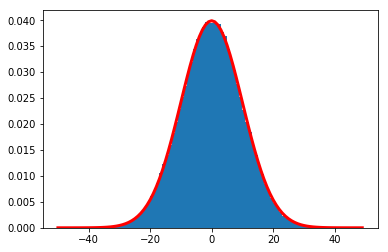

In [45]:
N = 300000

x = np.zeros(N)
delta = 2.
sigma = 10.
sigma2 = sigma**2
#diffmean=np.zeros(int (N/100))
diffvalue=np.zeros(N)
Naccept=0 
def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew
# Only here to get a better starting point
xwalker = 20.
Nwarmup = 500000
for i in range(Nwarmup):
    xwalker = metropolis(xwalker)
###
x[0] = xwalker
xavg2=x[0]**2
diffvalue[0]=abs(xavg2 - sigma2) / sigma2
for i in range(1,N):
    x0 = x[i-1]
    for j in range(10):
        x0 = metropolis(x0)
    x[i] = metropolis(x0)
    
    #diff[i%100 -1]=abs(xavg2/(i) - sigma2) / sigma2
    xavg2 += x[i]**2
    diffvalue[i]=abs(xavg2/(i+1) - sigma2) / sigma2
   # if (i%100 ==0):
       # diffmean[int(i/100)]=np.mean(diff)
        #print ('i=',i,'diffmean=', diffmean)
   
    if (x[i]!=x0): # acceptance 
        Naccept+=1
        

xavg2=xavg2 / N
print ('sigma2 =', sigma2, ' , <x^2> = ',xavg2)
binwidth=sigma/10
pyplot.hist(x,bins=np.arange(-50,50., binwidth),density=True);

norm = 1./(sigma*np.sqrt(2*np.pi))
pyplot.plot(np.arange(-50.,50.,binwidth),norm*np.exp(-0.5*np.arange(-50.,50.,binwidth)**2/sigma2),ls='-',c='red',lw=3);

# Acceptance ratio:
ratio=Naccept/N
print ('****************************** \n acceptance ratio = ',ratio , '\n****************************** ')


Text(0.5, 0, 'N')

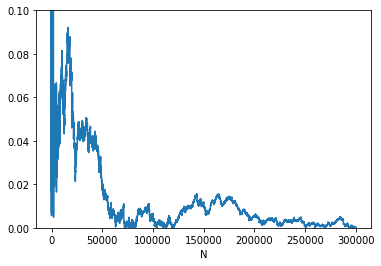

In [48]:
pyplot.plot(np.arange(0,N,1),diffvalue)
pyplot.ylim(0,0.1)
pyplot.xlabel('N')

### Dependence of acceptance ratio on $\delta$ and equilibrium time
### Based on the observation the following condition was used as equilibrium condition:
### $ \frac{|\sigma^2-<x^2>|}{\sigma^2} < 0.001$


In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 300000
sigma = 10.
sigma2 = sigma**2


x = np.zeros(N)

deltaarray = np.arange(0.5,5.5,1)

xavg2array=np.zeros(len(deltaarray))
Naccept=np.zeros(len(deltaarray))
ratio=np.zeros(len(deltaarray))
equitime = np.zeros(len(deltaarray))
diffvalue=np.zeros(N)

condition=0

def metropolis(xold,delta):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew


for j  in range (0,len(deltaarray)):
   
    
    delta=deltaarray[j]
    
    xwalker = 20.
    Nwarmup = 500000
    for i in range(Nwarmup):
        xwalker = metropolis(xwalker,delta)
        
    x[0] = xwalker
    xavg2 = x[0]**2 # <x^2>
    diffvalue[0]=abs(xavg2 - sigma2) / sigma2
    for i in range(1,N):
        x0 = x[i-1]
        for k in range(10):
            x0 = metropolis(x0,delta)
        x[i] = metropolis(x0,delta)
        xavg2 += x[i]**2
        diffvalue[i]=abs(xavg2/(i+1) - sigma2) / sigma2
        if (i>N/2 and condition ==0):
            if (diffvalue[i] < 0.005):
                equitime[j]= i 
                condition=1
        if (x[i]!=x0): # acceptance 
            
            Naccept[j]+=1
            
    ratio[j]=Naccept[j]/N 
     
    xavg2array[j]=xavg2/N
    
            


#print (xavg2array)
pyplot.plot(deltaarray,ratio)
pyplot.xlabel('delta')
pyplot.ylabel('Acceptance ratio')



Text(0, 0.5, 'Equilibrium time')

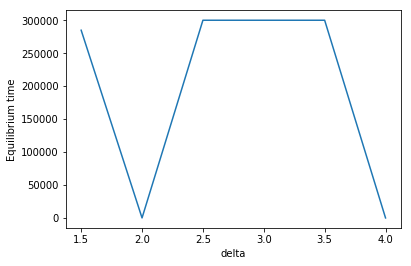

In [56]:
pyplot.plot(deltaarray,equitime)
pyplot.xlabel('delta')
pyplot.ylabel('Equilibrium time')